In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

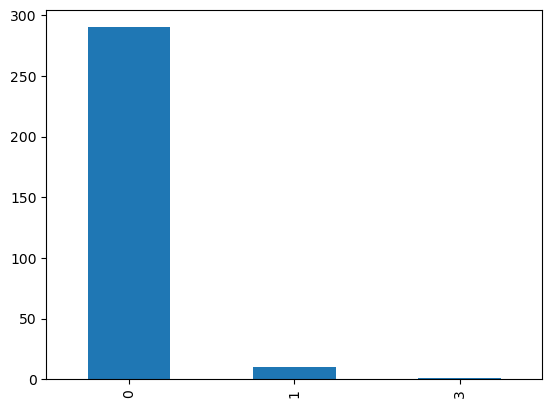

In [6]:
df['Owner'].value_counts().plot(kind='bar')

In [7]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [8]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

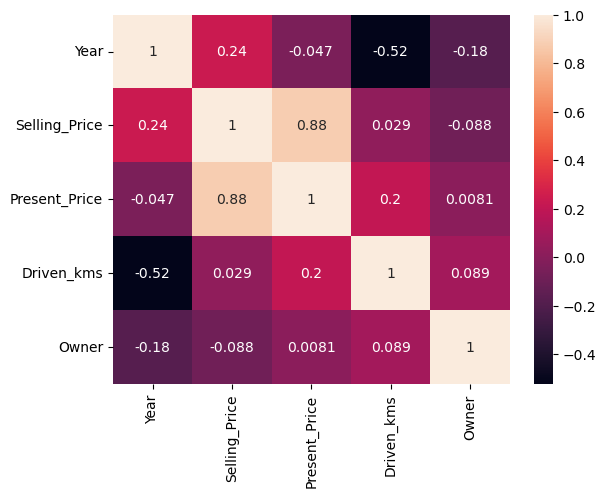

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
top10 = [x for x in df['Car_Name'].value_counts().sort_values(ascending=False).head(10).index]
top10

['city',
 'corolla altis',
 'verna',
 'fortuner',
 'brio',
 'ciaz',
 'innova',
 'i20',
 'grand i10',
 'Royal Enfield Classic 350']

### Only Considering top 10 Cars, Others are grouped into one

In [12]:
df['Car_Name']=df['Car_Name'].map(lambda x: x if x in top10 else 'Others')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Others,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Others,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Others,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Others,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [48]:
# one hot encoding
ohe = ColumnTransformer([
    ('OHE',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[0,4,5,6])
],remainder='passthrough')

In [14]:
df.shape

(301, 9)

In [49]:
StandardScaler()

StandardScaler()

In [50]:
# Scaling
ss = ColumnTransformer([
    ('scale',StandardScaler())
])

In [51]:
lr=LinearRegression()

In [19]:
X=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                random_state=42)

In [52]:
pipe = Pipeline([
    ('ohe',ohe),
    ('ss',StandardScaler()),
    ('LR',lr)
])

In [54]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4, 5, 6])])),
                ('ss', StandardScaler()), ('LR', LinearRegression())])

In [41]:
y_pred=pipe.predict(X_test)

In [28]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_test,y_pred)

0.8833786008005027

In [30]:
import pickle

In [34]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))